In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import warnings
import os

In [2]:
os.chdir("C:\\Users\\Divya\\Desktop\\Folder")
df = pd.read_csv('tested.csv')
df 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Explore the dataset

In [3]:
print(df.head())
print(df.info())
print(df.describe())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (

In [4]:
print(df.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


## Check for missing values

In [5]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [6]:
print(df.dtypes)


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


## Handle missing values 

In [7]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


## Visualize relationships

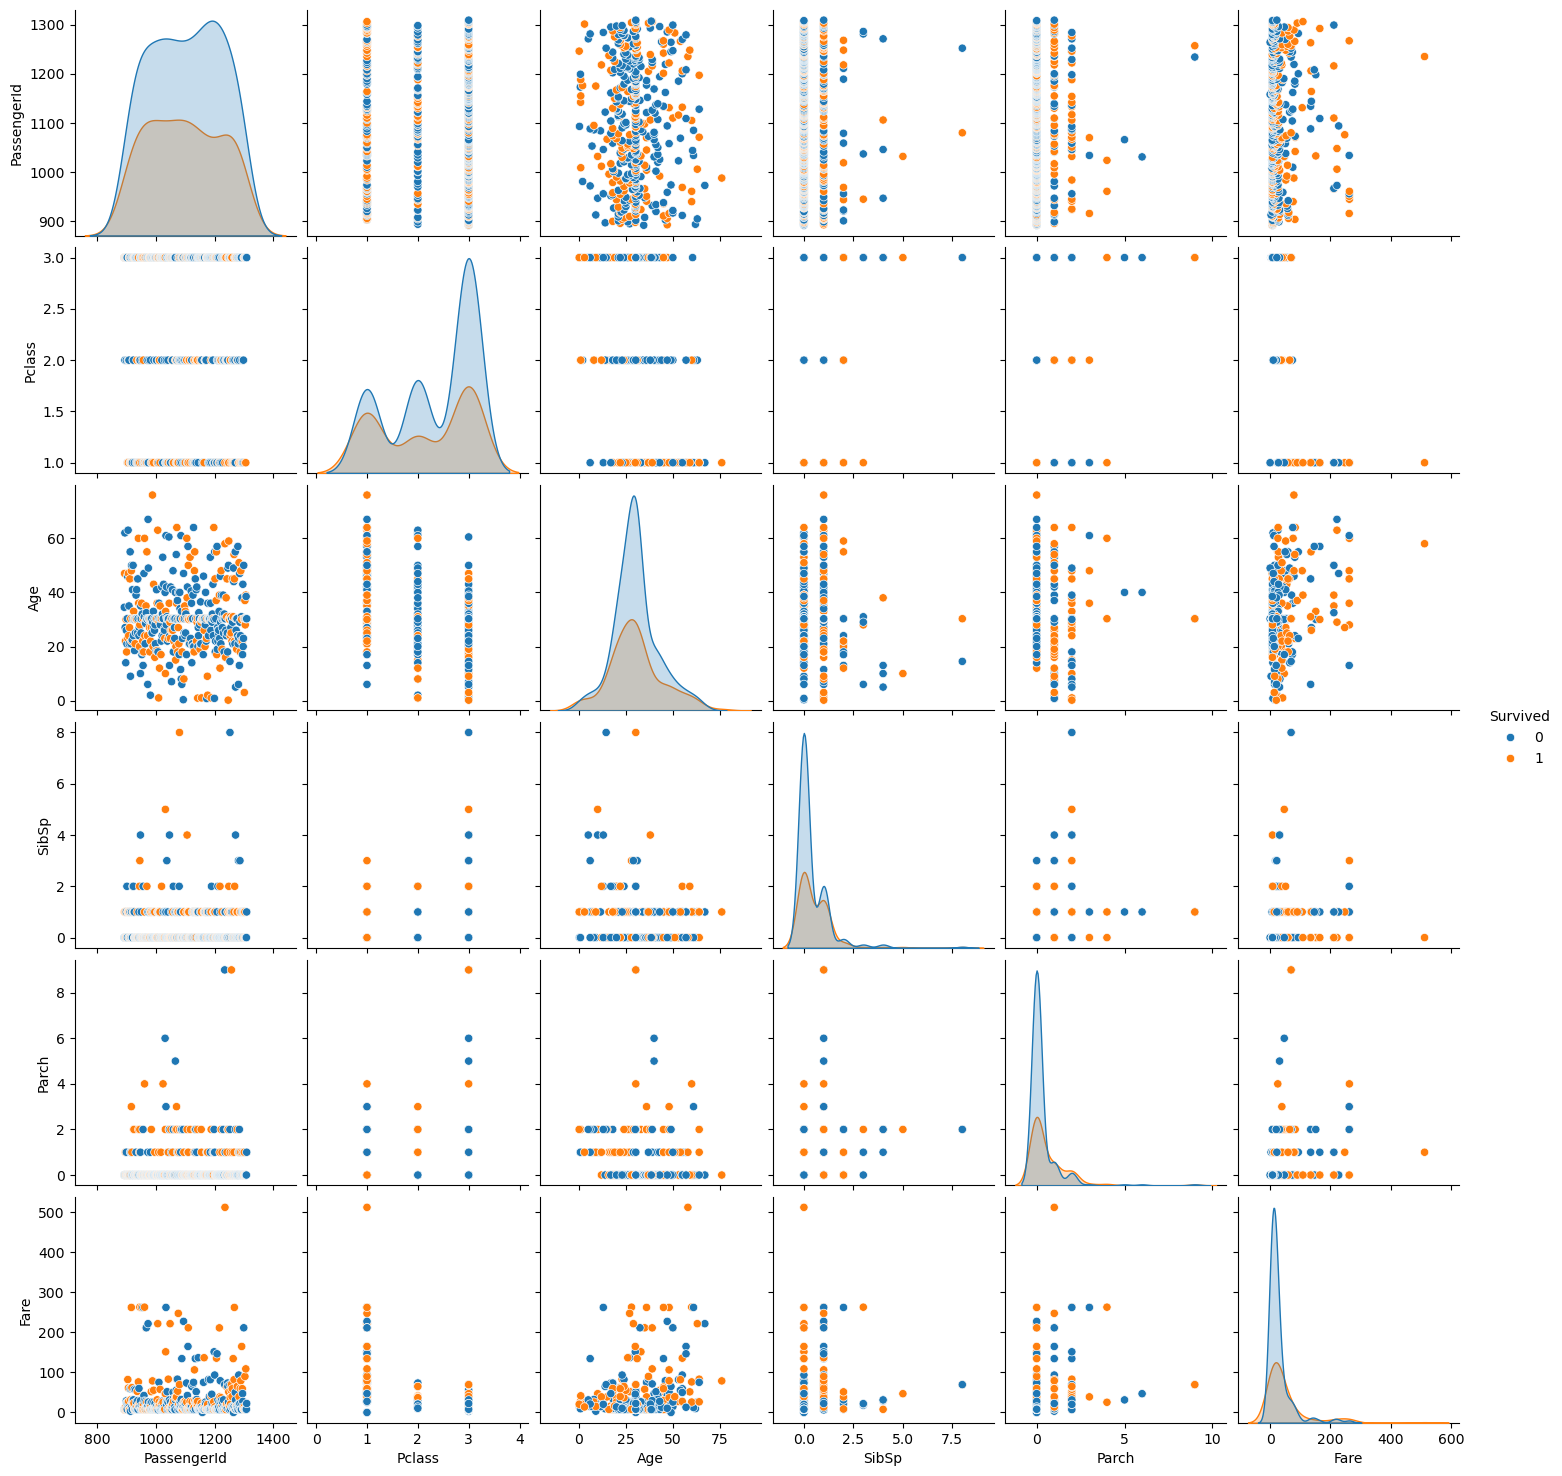

In [8]:
sns.pairplot(df, hue='Survived')
plt.show()



In [9]:
categorical_columns = df.select_dtypes(include=['object']).columns

# Display the identified categorical columns
print("Categorical Columns:")
print(categorical_columns)


Categorical Columns:
Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


## Histogram for numerical features

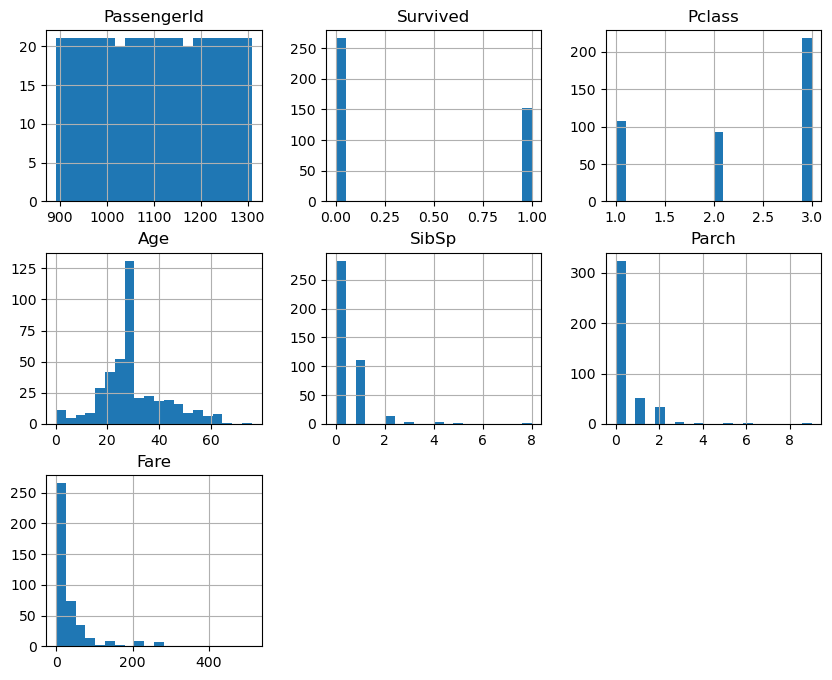

In [10]:
df.hist(figsize=(10, 8), bins=20)
plt.show()



## Bar plot for categorical features

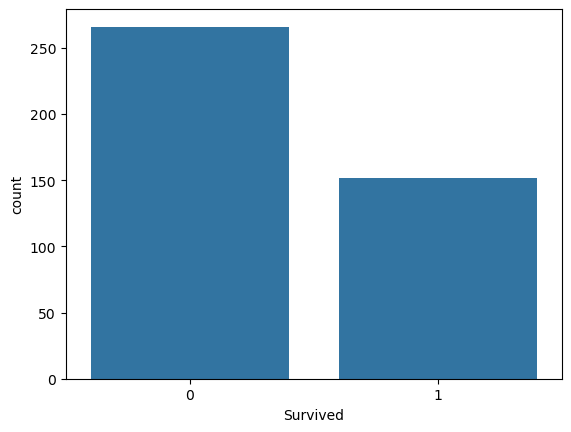

In [11]:
sns.countplot(x='Survived', data=df)
plt.show()


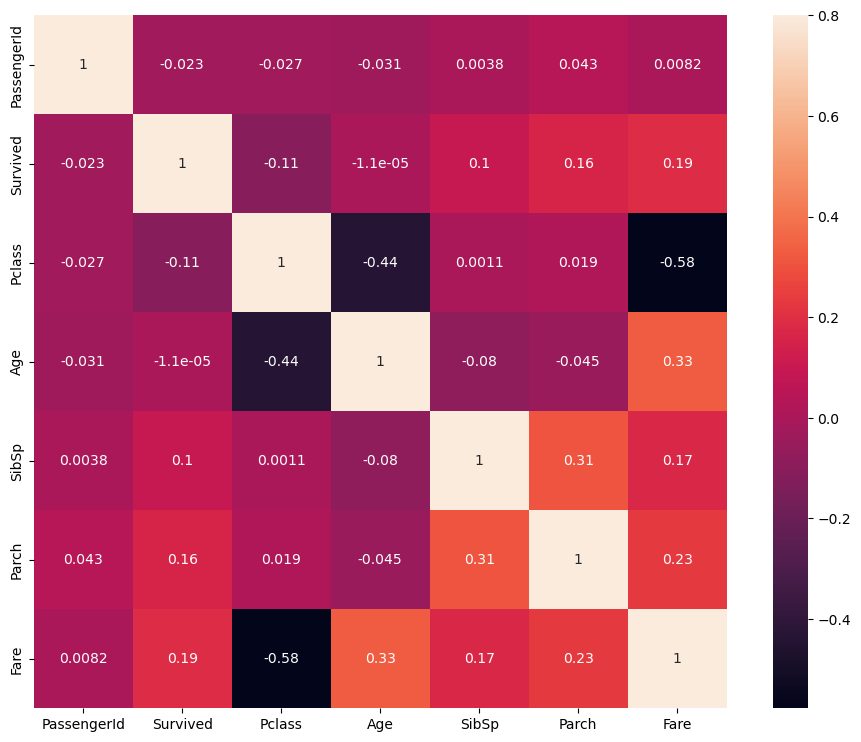

In [12]:
numeric_data = df.select_dtypes(include=['int64', 'float64'])

#create a correlation matrix
corrmat = numeric_data.corr()

#create a heatmap
fig = plt.figure(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.8, square=True, annot=True)
plt.show()


In [13]:
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical Columns:")
print(categorical_columns)
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


Categorical Columns:
Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [14]:
nan_columns = df.columns[df.isna().any()].tolist()
print("Columns with NaN values:", nan_columns)

df.fillna(df.mean(), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

print("Missing Values after Handling:")
print(df.isnull().sum())

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Columns with NaN values: ['Fare']
Missing Values after Handling:
PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
              ..
Cabin_F33      0
Cabin_F4       0
Cabin_G6       0
Embarked_Q     0
Embarked_S     0
Length: 864, dtype: int64


In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

predictions = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Accuracy: 0.9047619047619048
Confusion Matrix:
[[50  0]
 [ 8 26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        50
           1       1.00      0.76      0.87        34

    accuracy                           0.90        84
   macro avg       0.93      0.88      0.90        84
weighted avg       0.92      0.90      0.90        84



## Feature Engineering

In [16]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Double-check and drop unnecessary columns
columns_to_drop = ['Name', 'Ticket', 'Cabin']
df.drop(columns=columns_to_drop, errors='ignore', inplace=True)


## Split the data into features (X) and target variable (y)

In [17]:
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## Decision Tree

In [18]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

## Evaluate Decision Tree model

In [19]:
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_conf_matrix = confusion_matrix(y_test, dt_predictions)
dt_class_report = classification_report(y_test, dt_predictions)

print("Decision Tree Model:")
print(f"Accuracy: {dt_accuracy}")
print(f"Confusion Matrix:\n{dt_conf_matrix}")
print(f"Classification Report:\n{dt_class_report}")

Decision Tree Model:
Accuracy: 1.0
Confusion Matrix:
[[50  0]
 [ 0 34]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



## Random Forest

In [20]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

## Evaluate Random Forest model

In [21]:
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
rf_class_report = classification_report(y_test, rf_predictions)

print("\nRandom Forest Model:")
print(f"Accuracy: {rf_accuracy}")
print(f"Confusion Matrix:\n{rf_conf_matrix}")
print(f"Classification Report:\n{rf_class_report}")



Random Forest Model:
Accuracy: 1.0
Confusion Matrix:
[[50  0]
 [ 0 34]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

